In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cap = cv2.VideoCapture("Car_traffic_g2_c18.mp4")

## Read the first image show this image and create the array taht will store the vectors

In [3]:
ret, frame1 = cap.read()
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255
print(frame1.shape)

#plt.imshow(frame1)

(558, 390, 3)


(558, 390, 2)
(558, 390)
(558, 390)
(558, 390, 3)
(558, 390, 3)
(558, 390, 3)
(558, 390, 3)


NameError: name 'asdf' is not defined

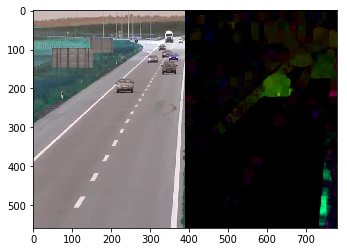

In [4]:
img = None

#------------------------Frames Width and Height of the video------------------------------
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
#------------------------------------------------------------------------------------------

out = cv2.VideoWriter("Car_traffic_g2_c18_OpticalFlow.mp4",cv2.VideoWriter_fourcc(*'mp4v'),25,(frameWidth*2,frameHeight))

for i in range (frameCount-1):
    ret, frame2 = cap.read() # Read the second frame 
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0) # we always need to find the optical flow between two images
    print(flow.shape)
    print(flow[...,0].shape)
    print(flow[...,1].shape)
    print(hsv.shape)
    
    
    #--------------Prepare the Image to show Optical Flow-------
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    print(hsv.shape)
    bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    #-----------------------------------------------------------
    
    # print(frameCount,i)
    print(frame2.shape)
    print(bgr.shape)
    res = np.concatenate((frame2,bgr),axis=1)
    
    out.write(res)
    
    plt.imshow(res)
    #plt.pause(.1)
    asdf
    #---------------------------------------------
    
    #-------------Saave the results to a video-----
    
    #----------------------------------------------
    
    prvs = next
    
out.release()
# cv.imshow('frame2',bgr)
# k = cv.waitKey(30) & 0xff
# #     if k == 27:
# break
# #     elif k == ord('s'):
# #         cv.imwrite('opticalfb.png',frame2)
# #         cv.imwrite('opticalhsv.png',bgr)
# prvs = next
# cap.release()

(540, 960, 3)
(540, 960, 3)
(540, 960, 3)


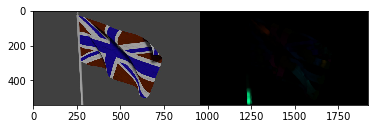

In [27]:
frame1 = cv2.imread('Image0050.jpg')
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

frame2 = cv2.imread('Image0051.jpg')
next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0) # we always need to find the optical flow between two images
#flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 5, 8, 1, 0) # we always need to find the optical flow between two images

mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
print(hsv.shape)
bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

print(frame1.shape)
print(bgr.shape)
res = np.concatenate((frame1,bgr),axis=1)

plt.imshow(res)